In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


# Dataset
dataset = 'mnist'

# Define transformations
transform_mnist = transforms.ToTensor()

# Set up dataset and input size
input_size = 28 * 28  # Flattened size of MNIST images (28x28)
train_data = datasets.MNIST(root='C:\\Users\\lokes\\OneDrive\\Desktop\\deep', train=True, download=True, transform=transform_mnist)
test_data = datasets.MNIST(root='C:\\Users\\lokes\\OneDrive\\Desktop\\deep', train=False, download=True, transform=transform_mnist)
num_classes = 10

# Dataloaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)


class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(NeuralNet, self).__init__()
        self.layers = nn.ModuleList()  # List to store layers dynamically
        prev_layer_size = input_size

        for hidden_layer_size in hidden_layers:
            self.layers.append(nn.Linear(prev_layer_size, hidden_layer_size))
            prev_layer_size = hidden_layer_size

        self.output = nn.Linear(prev_layer_size, output_size)

    def forward(self, x):
        for layer in self.layers:
            x = F.relu(layer(x))
        x = self.output(x)
        return x


def train_model(model, criterion, optimizer, train_loader, test_loader, num_epochs=10):
    train_losses, test_losses = [], []
    train_accs, test_accs = [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss, running_correct = 0.0, 0
        total_train = 0

        for inputs, labels in train_loader:
            inputs = inputs.view(-1, input_size)  # Flatten inputs
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            running_correct += (predicted == labels).sum().item()
            total_train += labels.size(0)

        train_loss = running_loss / len(train_loader)
        train_acc = running_correct / total_train
        train_losses.append(train_loss)
        train_accs.append(train_acc)

        # Testing phase
        model.eval()
        test_loss, test_correct = 0.0, 0
        total_test = 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs = inputs.view(-1, input_size)  # Flatten inputs
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                test_correct += (predicted == labels).sum().item()
                total_test += labels.size(0)

        test_loss = test_loss / len(test_loader)
        test_acc = test_correct / total_test
        test_losses.append(test_loss)
        test_accs.append(test_acc)

        print(f"Epoch {epoch+1}/{num_epochs} -> Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

    return train_losses, test_losses, train_accs, test_accs

# Different model configurations (hidden layer sizes)
hidden_layer_configs = [
    [8, 16],    # Model 1: Few parameters
    [16, 32],   # Model 2
    [32, 64],   # Model 3
    [64, 128],  # Model 4
    [128, 256], # Model 5
    [256, 512], # Model 6
    [512, 256], # Model 7
    [512, 512], # Model 8
    [512, 1024],# Model 9
    [1024, 512] # Model 10: Many parameters
]

# Set up criterion and number of epochs
criterion = nn.CrossEntropyLoss()
num_epochs = 10
learning_rate = 0.001

# Store model results
model_results = {}

# Loop through all model configurations
for idx, hidden_layers in enumerate(hidden_layer_configs, 1):
    print(f"Training Model {idx} with hidden layers {hidden_layers}")

    # Initialize model with dynamic hidden layers
    model = NeuralNet(input_size=input_size, hidden_layers=hidden_layers, output_size=num_classes)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    train_losses, test_losses, train_accs, test_accs = train_model(model, criterion, optimizer, train_loader, test_loader, num_epochs=num_epochs)

    # Store results
    model_results[idx] = {
        "hidden_layers": hidden_layers,
        "train_losses": train_losses,
        "test_losses": test_losses,
        "train_accs": train_accs,
        "test_accs": test_accs,
        "num_params": sum(p.numel() for p in model.parameters() if p.requires_grad)
    }




Training Model 1 with hidden layers [8, 16]
Epoch 1/10 -> Train Loss: 0.7381, Train Acc: 0.7784, Test Loss: 0.4015, Test Acc: 0.8870
Epoch 2/10 -> Train Loss: 0.3732, Train Acc: 0.8938, Test Loss: 0.3363, Test Acc: 0.9024
Epoch 3/10 -> Train Loss: 0.3262, Train Acc: 0.9079, Test Loss: 0.3088, Test Acc: 0.9102
Epoch 4/10 -> Train Loss: 0.3025, Train Acc: 0.9147, Test Loss: 0.2940, Test Acc: 0.9153
Epoch 5/10 -> Train Loss: 0.2882, Train Acc: 0.9185, Test Loss: 0.2807, Test Acc: 0.9169
Epoch 6/10 -> Train Loss: 0.2784, Train Acc: 0.9208, Test Loss: 0.2816, Test Acc: 0.9172
Epoch 7/10 -> Train Loss: 0.2723, Train Acc: 0.9228, Test Loss: 0.2836, Test Acc: 0.9165
Epoch 8/10 -> Train Loss: 0.2676, Train Acc: 0.9237, Test Loss: 0.2668, Test Acc: 0.9213
Epoch 9/10 -> Train Loss: 0.2622, Train Acc: 0.9247, Test Loss: 0.2682, Test Acc: 0.9235
Epoch 10/10 -> Train Loss: 0.2578, Train Acc: 0.9264, Test Loss: 0.2600, Test Acc: 0.9243
Training Model 2 with hidden layers [16, 32]
Epoch 1/10 -> Train 

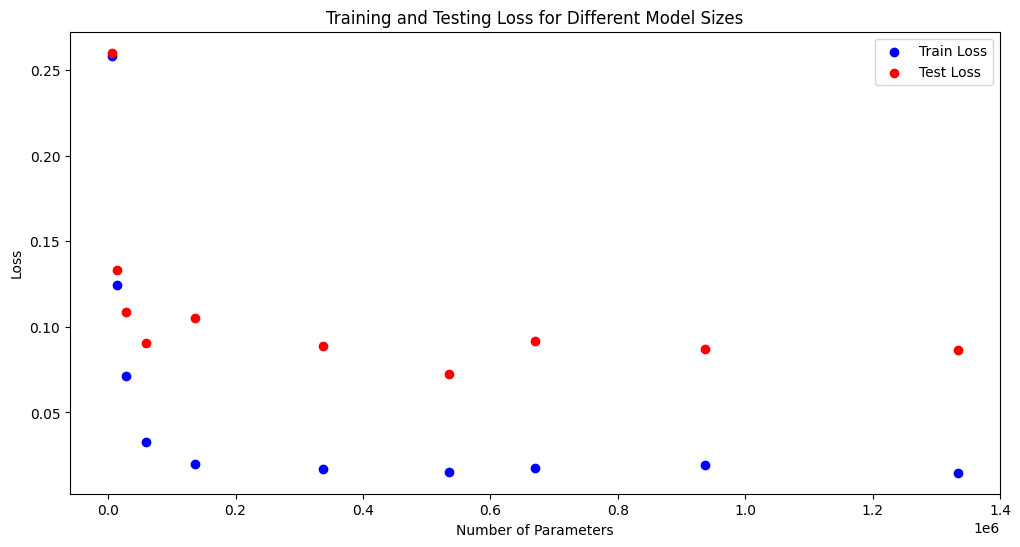

In [6]:
# Plot training and testing losses
plt.figure(figsize=(12, 6))
for idx in model_results:
    num_params = model_results[idx]["num_params"]
    plt.scatter(num_params, model_results[idx]["train_losses"][-1], c='b', label='Train Loss' if idx == 1 else "")
    plt.scatter(num_params, model_results[idx]["test_losses"][-1], c='r', label='Test Loss' if idx == 1 else "")

plt.title("Training and Testing Loss for Different Model Sizes")
plt.xlabel("Number of Parameters")
plt.ylabel("Loss")
plt.legend()
plt.show()




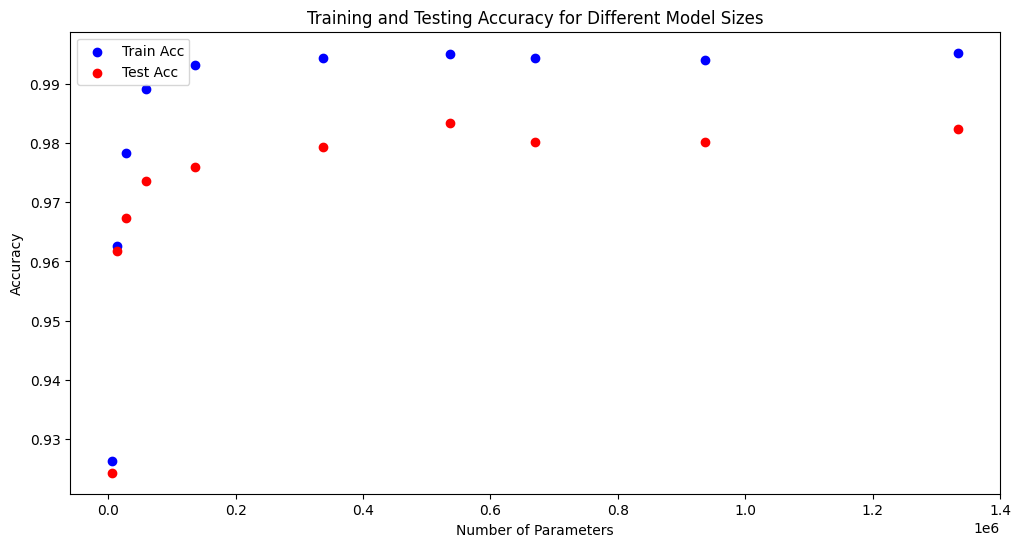

In [7]:
# Plot training and testing accuracy
plt.figure(figsize=(12, 6))
for idx in model_results:
    num_params = model_results[idx]["num_params"]
    plt.scatter(num_params, model_results[idx]["train_accs"][-1], c='b', label='Train Acc' if idx == 1 else "")
    plt.scatter(num_params, model_results[idx]["test_accs"][-1], c='r', label='Test Acc' if idx == 1 else "")

plt.title("Training and Testing Accuracy for Different Model Sizes")
plt.xlabel("Number of Parameters")
plt.ylabel("Accuracy")
plt.legend()
plt.show()